# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [1]:
import os

practice_dir_path = 'E:\\универ\\Анализ и прогнозирование временных рядов методами искусственного интеллекта\\1\\2024-Gorbunov-TimeSeriesCourse\\practice\\04 Matrix profile'
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [5]:
pip install stumpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\seryk\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install plotly


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\seryk\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install numpy==2.0


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.5 MB 4.2 MB/s eta 0:00:04
   ------------------- -------------------- 8.1/16.5 MB 24.0 MB/s eta 0:00:01
   -------------------------- ------------- 11.0/16.5 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 16.5/16.5 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Rolling back uninstall of numpy
  Moving to c:\users\seryk\appdata\local\programs\python\python311\lib\site-packages\numpy-1.24.4.dist-info\
   from C:\Users\seryk\AppData\Local\Programs\Python\Python311\Lib\site-packages\~umpy-1.24.4.dist-info
  Moving to c:\users\seryk\appdata\local\programs\python\python311\lib\site-packages\numpy\.libs\
   from C:\Users\seryk\AppData\Local\Programs\Py

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\Users\\seryk\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\numpy\\_core\\_multiarray_umath.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

In [10]:
pip install --upgrade numpy scipy


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Requirement already up-to-date: numpy in c:\users\seryk\appdata\local\programs\python\python38\lib\site-packages (1.24.4)
Requirement already up-to-date: scipy in c:\users\seryk\appdata\local\programs\python\python38\lib\site-packages (1.10.1)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\seryk\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [39]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [6]:
plot_ts(ts, "Input time series")

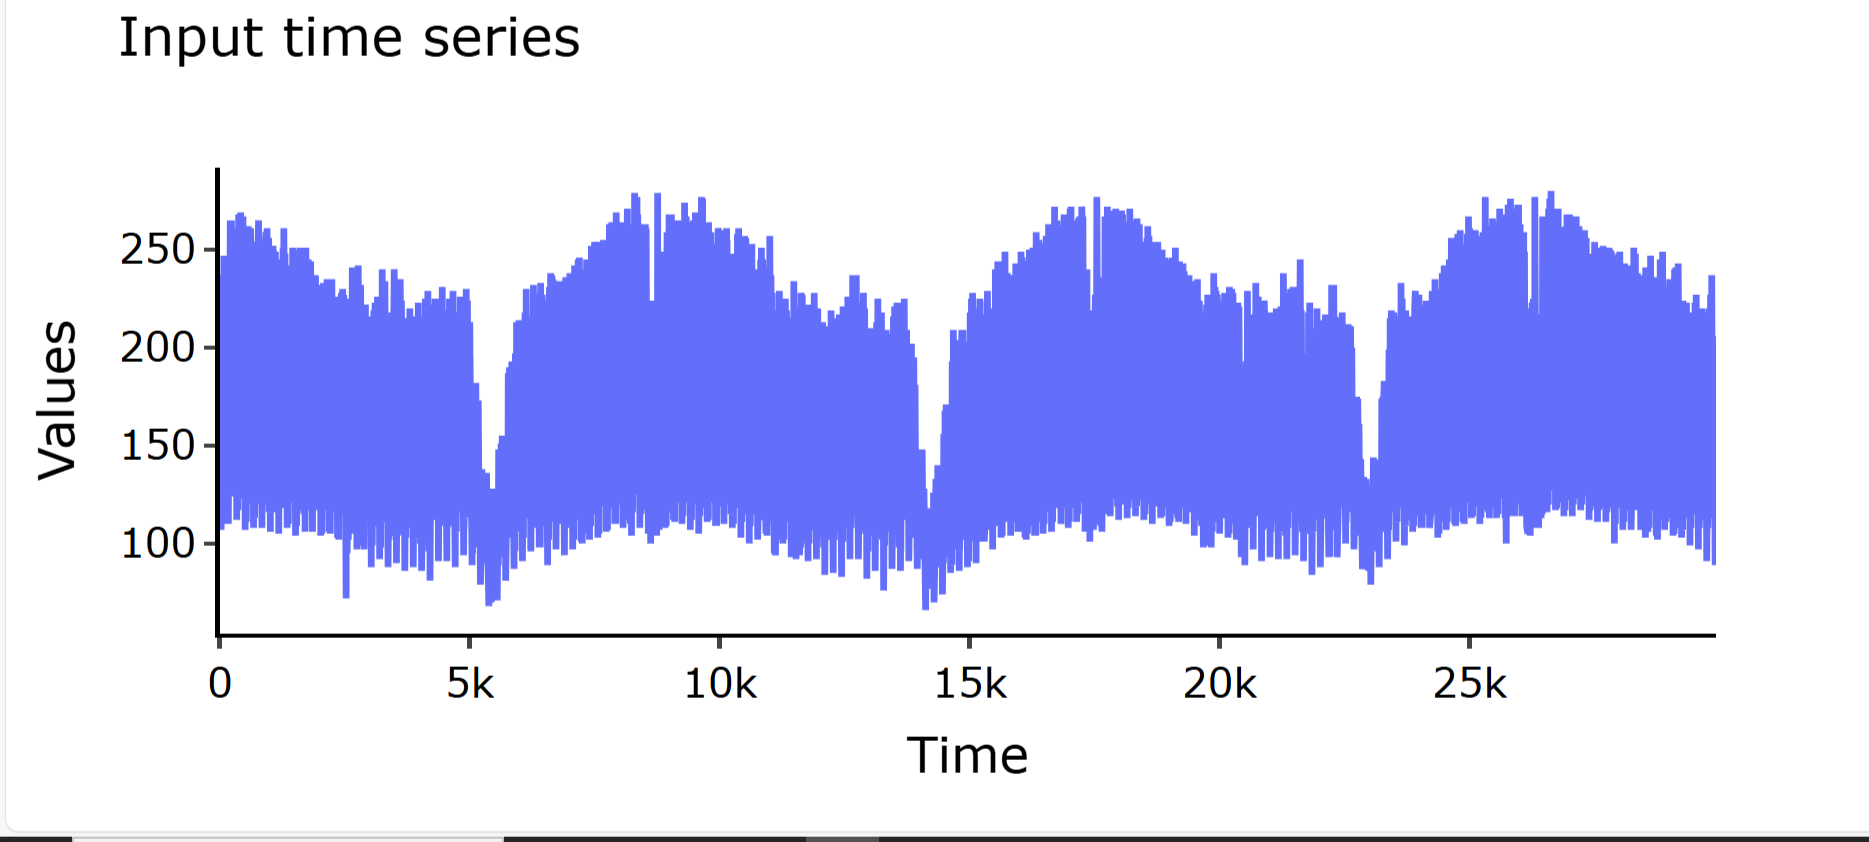

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [45]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}


In [46]:
# Вычисление матричного профиля
mp = compute_mp(ts1=ts, m=m)
# Вывод результатов 
print("Matrix Profile:", mp['mp'])
print("Matrix Profile Indices:", mp['mpi'])

Matrix Profile: [2.6090936641684754 2.5924180135436403 2.5987763812474363 ...
 2.00768186761169 2.0206415581726054 2.030675731612961]
Matrix Profile Indices: [ 8761  8762  8763 ... 21195 21196 21197]


Визуализируйте найденный матричный профиль ряда.

In [17]:
plot_ts(mp['mp'], "Matrix Profile")

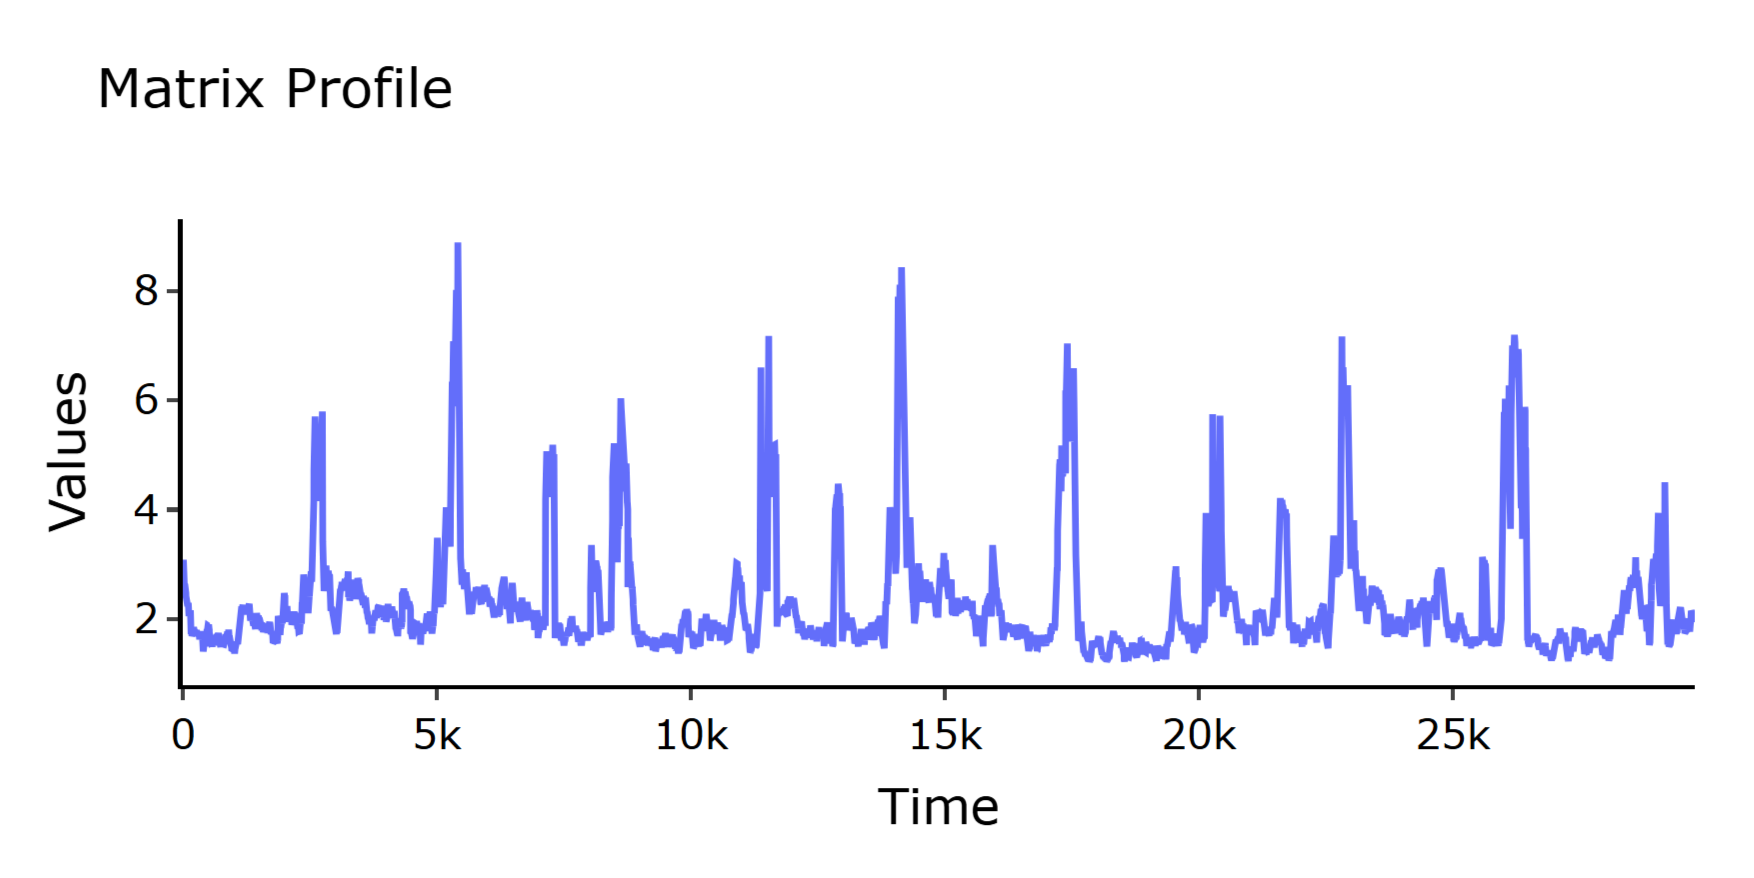

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [ ]:
top_k = 6
motifs = {}



In [20]:
# Поиск топ-6 мотивов
top_k = 6
motifs = top_k_motifs(matrix_profile=mp, top_k=top_k)

# Вывод результатов
print("Top-6 Motifs Indices:", motifs['indices'])
print("Top-6 Motifs Distances:", motifs['distances'])

Top-6 Motifs Indices: [(17852, 18188), (17853, 18189), (17858, 18194), (17859, 18195), (18539, 27276), (17857, 18193)]
Top-6 Motifs Distances: [1.2266251888855342, 1.2319762049914282, 1.2331215982682417, 1.2348270474649155, 1.2356334381463014, 1.236240588857564]


Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [21]:
plot_motifs(mp, motifs)

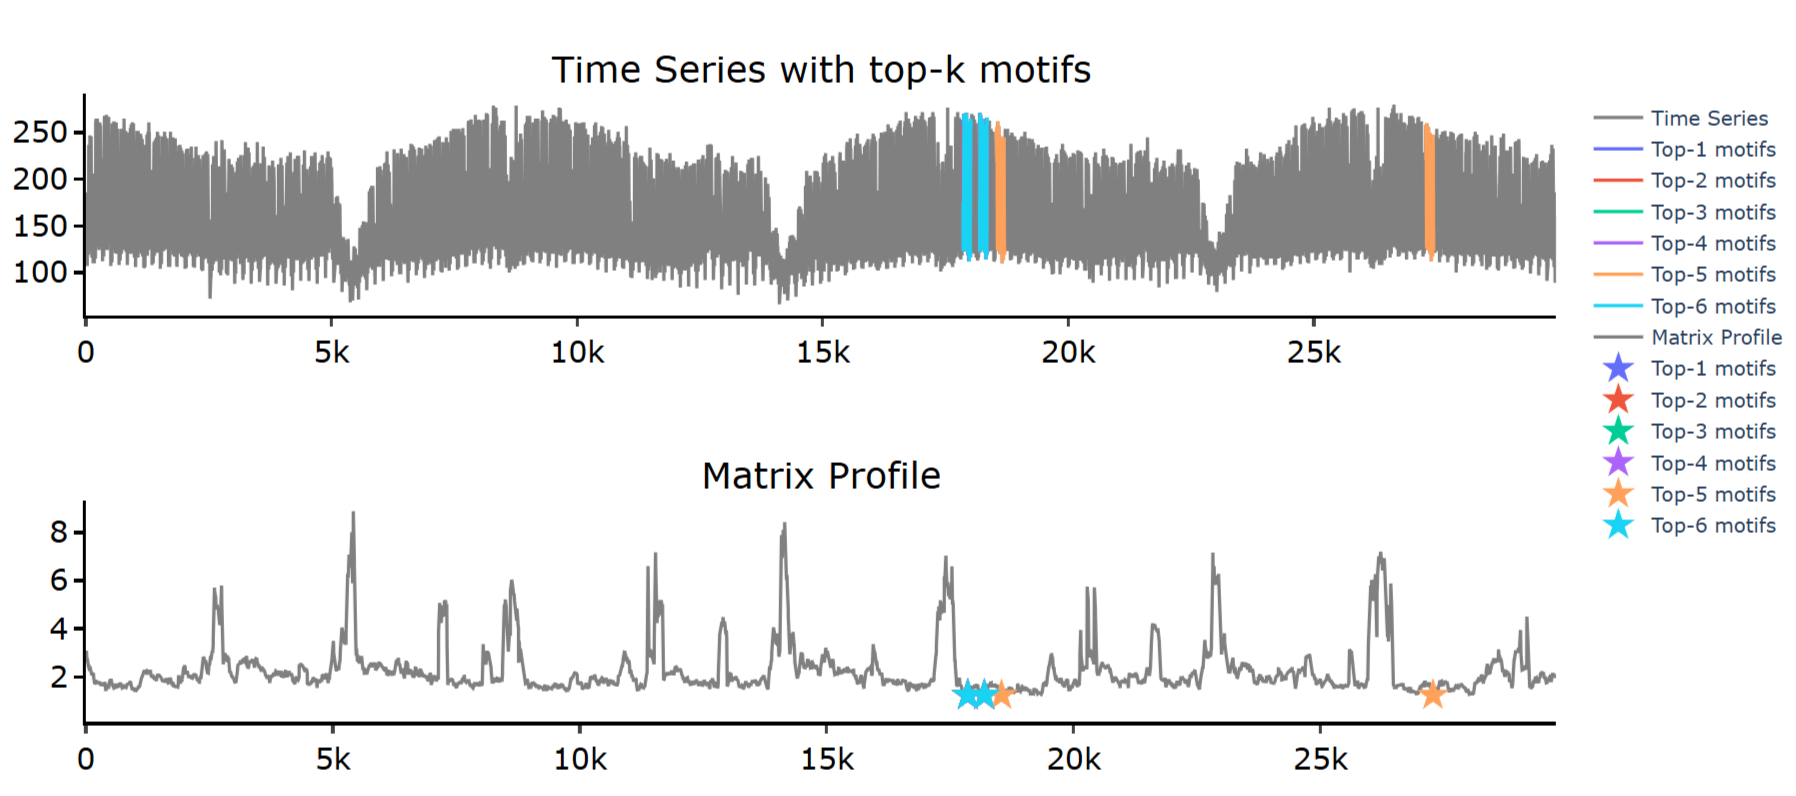  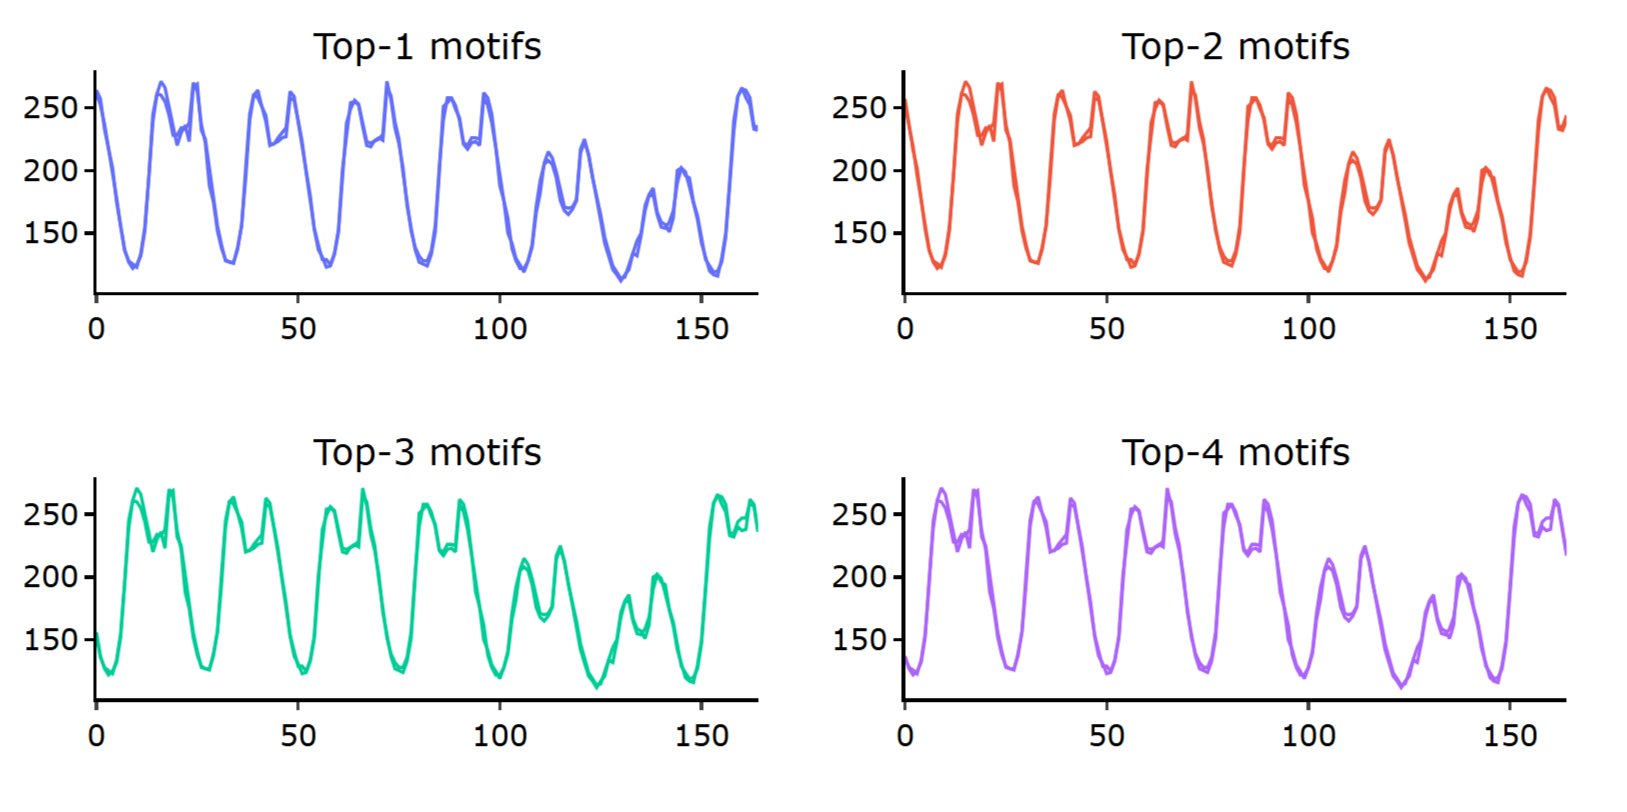 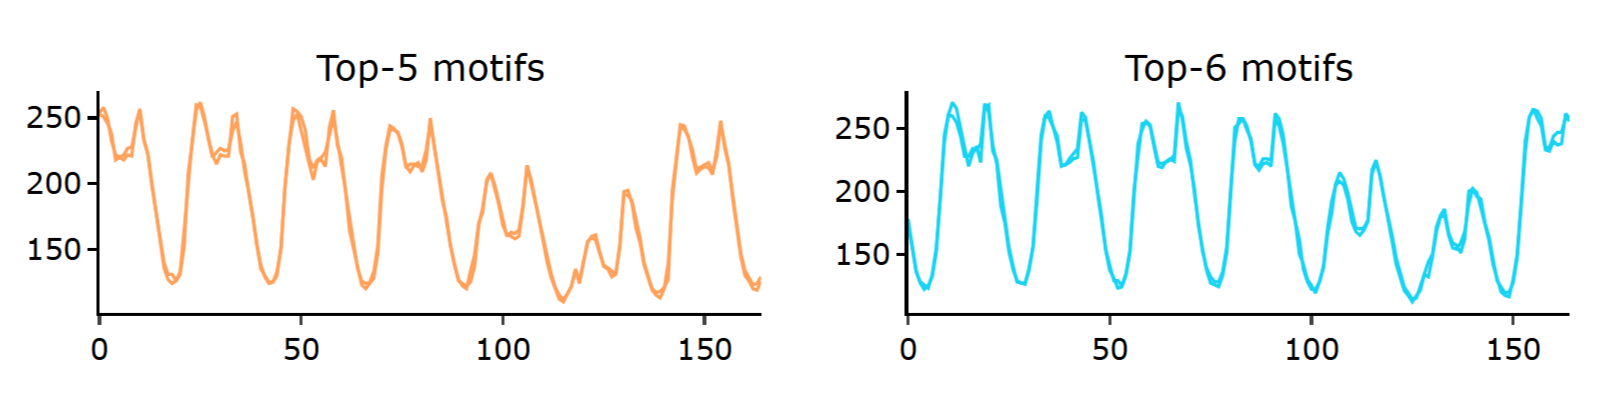

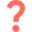
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*

Общий анализ

Временной ряд: В верхней части графика представлен временной ряд, который, судя по форме, вероятно, представляет собой данные с сезонными колебаниями, например, спрос на электроэнергию (исходя из файла italianpowerdemand.csv). На графике видно, что присутствуют периоды с более высокими амплитудами колебаний и периоды со спадом активности.

Матричный профиль: Под графиком временного ряда расположен матричный профиль. Матричный профиль отображает минимальные дистанции между каждыми подпоследовательностями временного ряда и их наиболее похожими подпоследовательностями. Низкие значения профиля указывают на схожие участки во временном ряде, что является индикатором возможных мотивов. В профиле видно несколько ярко выраженных минимумов, которые и указывают на вероятные мотивы.

Топ-6 мотивов: Ниже матричного профиля представлены графики топ-6 мотивов. Каждый мотив представлен двумя подпоследовательностями временного ряда, которые находятся на разных позициях, но обладают очень похожими формами.

Интерпретация результатов
Топ-6 мотивов и их индексы

Индексы мотивов: В результатах указаны индексы наиболее схожих пар подпоследовательностей. Например, для топ-1 мотива это индексы (17852, 18188), что означает, что на позициях 17852 и 18188 во временном ряде находятся схожие сегменты длиной, соответствующей заданной длине m.
Расстояния: В списке расстояний указаны численные значения, которые измеряют степень сходства между парами мотивов. Чем меньше значение расстояния, тем более похожи эти подпоследовательности. Например, для топ-1 мотива расстояние составляет 1.226, что указывает на высокий уровень сходства между этими двумя сегментами.

Анализ мотивов

Сезонные и повторяющиеся паттерны: Выявленные мотивы, вероятно, указывают на повторяющиеся паттерны или циклы в данных. Например, схожие сегменты могут указывать на регулярные пики потребления электроэнергии в определённое время года или в определённые периоды.

Топ-6 мотивов как циклы: Мотивы с небольшим расстоянием друг от друга подтверждают гипотезу о циклической природе временного ряда. Выделенные мотивы имеют аналогичную форму, что характерно для временных рядов с повторяющимися циклами.

Зона исключения: Применение зоны исключения помогло избежать тривиальных совпадений, и, несмотря на это, все найденные топ-6 мотивов располагаются близко друг к другу по значению. Это может указывать на то, что временной ряд обладает значительной структурой и регулярностью.

Возможные выводы

Ценность мотивов: Повторяющиеся паттерны могут быть полезны для прогнозирования и выявления аномалий. Например, если в будущем подобный паттерн не повторится, это может сигнализировать о необычном событии или изменении в тренде.
Использование в моделях: Мотивы можно использовать для обучения предсказательных моделей, поскольку они описывают важные структурные элементы временного ряда.

Заключение

Анализ топ-6 мотивов временного ряда позволил выявить повторяющиеся паттерны в данных, которые могут представлять циклические закономерности, такие как сезонные пики и спады. Эти данные могут быть полезны для дальнейшего анализа, особенно для прогнозирования будущих значений временного ряда.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [47]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

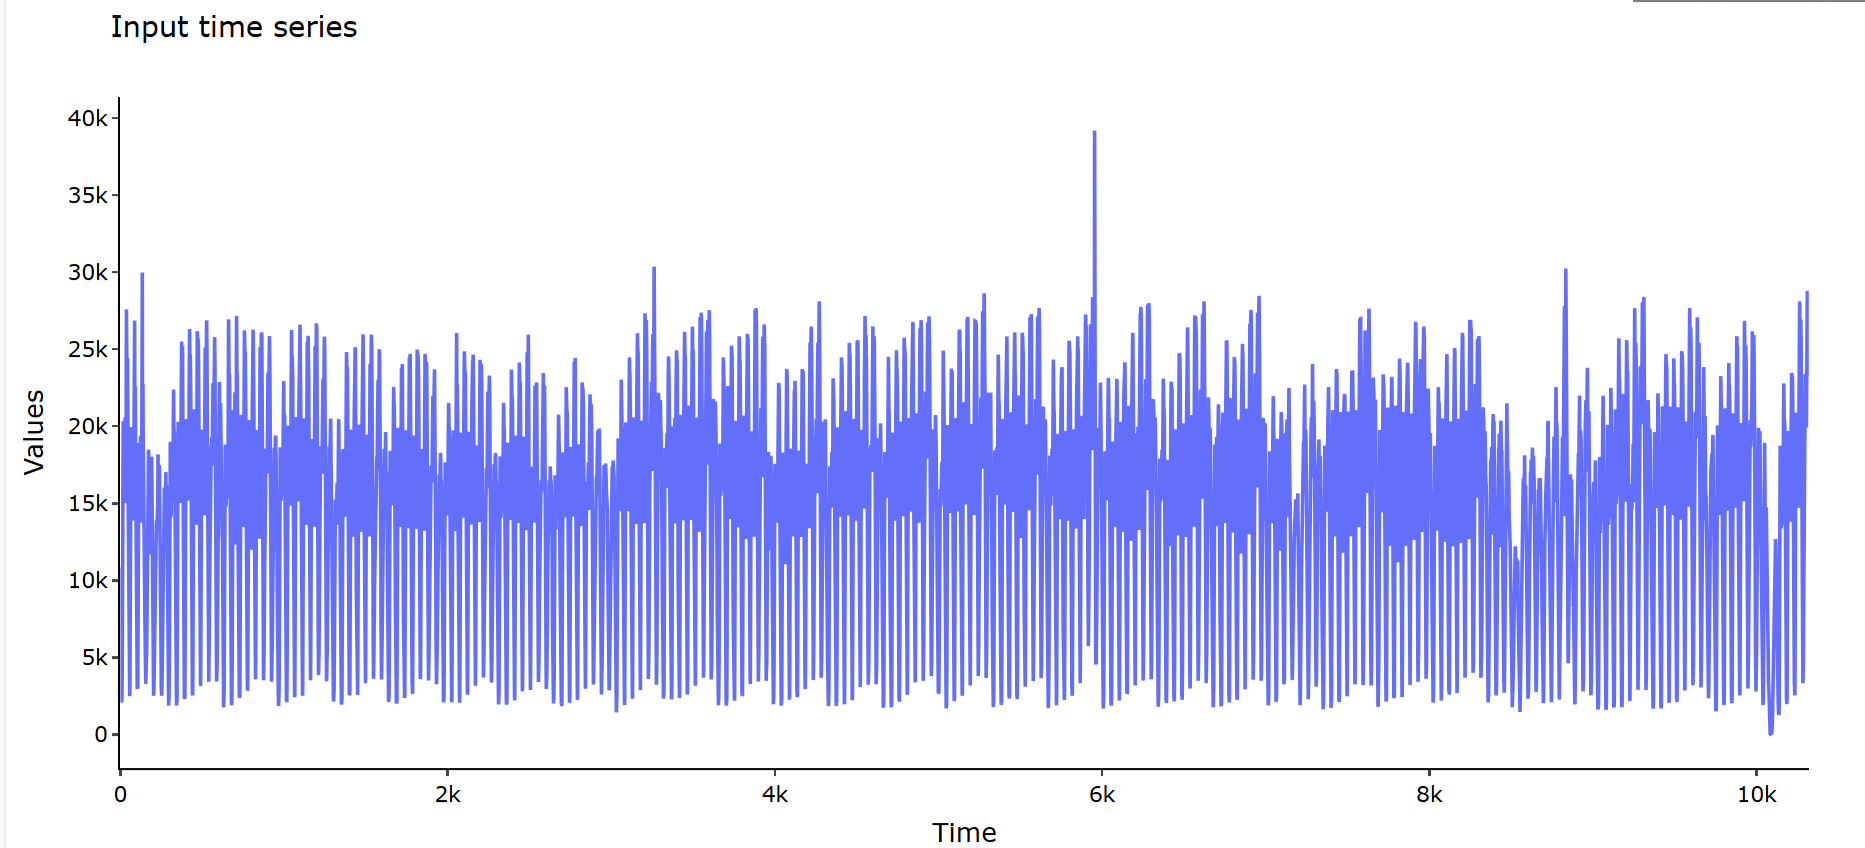

In [48]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy().astype(np.float64)

mp = compute_mp(ts, m)  


In [49]:
print(type(mp))
print(mp)


<class 'dict'>
{'mp': mparray([1.6758795908961541, 1.7062148811057143, 1.7171465700599446, ...,
         1.2289710996488397, 1.2082817443578697, 1.1948212746737672],
        dtype=object), 'mpi': mparray([ 336,  337,  338, ..., 9550, 9551, 9552]), 'm': 96, 'data': {'ts1': array([10844.,  8127.,  6210., ..., 27309., 26591., 26288.]), 'ts2': None}}


In [52]:
# Устанавливаем зону исключения и вычисляем top-k дискордов
m = 96
excl_zone = int(np.ceil(m / 2))  # Определяем exclusion zone
top_k = 15
discords = top_k_discords(matrix_profile=mp, excl_zone=excl_zone, top_k=top_k)

# Вывод результатов
print("Top-15 Индексы Дискордов:", discords['indices'])
print("Top-15 Дистанции Дискордов:", discords['distances'])
print("Top-15 Индексы Ближайших Соседей Дискордов:", discords['nn_indices'])

Top-15 Индексы Дискордов: [9985, 10048, 8784, 10097, 8837, 5868, 105, 9651, 8449, 5954, 7107, 154, 8396, 8640, 2930]
Top-15 Дистанции Дискордов: [7.67611937328928, 7.528591080691795, 6.0735510994492445, 5.111043244960375, 4.4922940126597695, 4.24104374580838, 4.165698256274298, 3.9471034653624595, 3.7361108831969605, 3.706803612131956, 3.698884380036356, 3.441477020451118, 3.3602385691082866, 3.2855364012282813, 3.1770979488517614]
Top-15 Индексы Ближайших Соседей Дискордов: [9650, 8469, 9263, 257, 5618, 6204, 7112, 8307, 7104, 5282, 8452, 7210, 8348, 7295, 194]


Выполните визуализацию найденных top-$k$ диссонансов.

In [53]:
plot_discords(mp, discords)

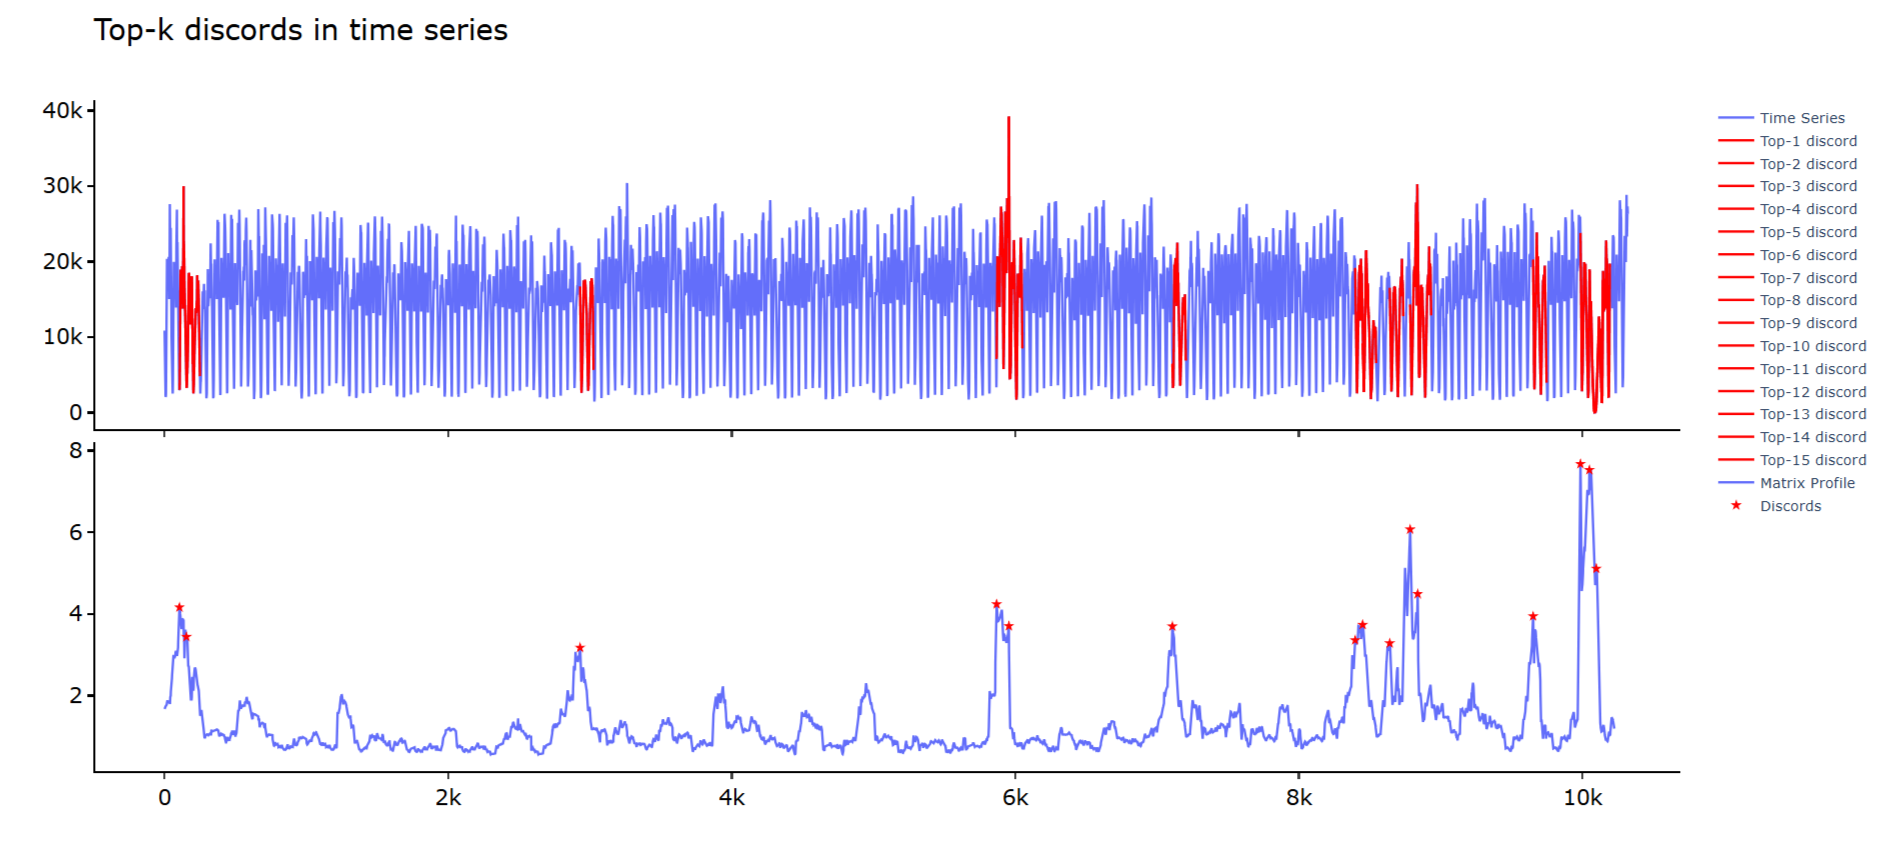

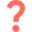
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*

Изучив предоставленный график и результаты вычислений матричного профиля и дискордов, можно сделать следующие выводы о временном ряде (числе поездок на такси в Нью-Йорке) и аномальных сегментах в нем:

Матричный профиль: График в нижней части визуализирует матричный профиль временного ряда. Значения профиля показывают схожесть между сегментами временного ряда. Низкие значения в матричном профиле указывают на высокую степень схожести между сегментами, тогда как высокие значения свидетельствуют о потенциальных аномалиях или "дискордах".

Дискорды: Дискорды — это сегменты временного ряда, которые меньше всего похожи на другие сегменты и, вероятно, представляют собой аномалии.
В верхнем графике временного ряда выделены красным цветом топ-15 дискордов, которые представляют аномальные паттерны или редкие события. Эти сегменты могут соответствовать необычным или редким событиям, влияющим на поездки на такси в городе. Такие события могут включать праздничные дни, экстремальные погодные условия, транспортные проблемы, митинги или даже чрезвычайные ситуации.
Примерно на индексах, которые указаны в результатах (например, 9985, 10048 и 8784), наблюдаются заметные пики, что указывает на аномально высокое или низкое число поездок.

Анализ Дистанций Дискордов: Значения "дистанций дискордов" показывают степень отклонения каждого дискорда от ближайшего похожего сегмента. Высокие значения этих дистанций указывают на сильное отклонение дискордов от остальных данных. Например, дискорд с индексом 9985 имеет самую высокую дистанцию (7.676), что указывает на то, что он наименее похож на остальные сегменты и, вероятно, является самой значимой аномалией.

Индексы Ближайших Соседей: В графике также отображены индексы ближайших соседей для каждого дискорда. Это сегменты, которые наиболее близки к дискордам по схожести, но всё же достаточно отличаются, чтобы считать их менее аномальными.

Возможные интерпретации:

Эти аномальные сегменты (дискорды) могут свидетельствовать о специфических событиях в городе, таких как праздничные выходные, экстремальные погодные условия или другие инциденты, которые повлияли на количество поездок на такси.
Аномалии могут также свидетельствовать о сбоях в данных, например, из-за технических проблем при сборе данных.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [54]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [55]:
plot_ts(ts, "Input time series")

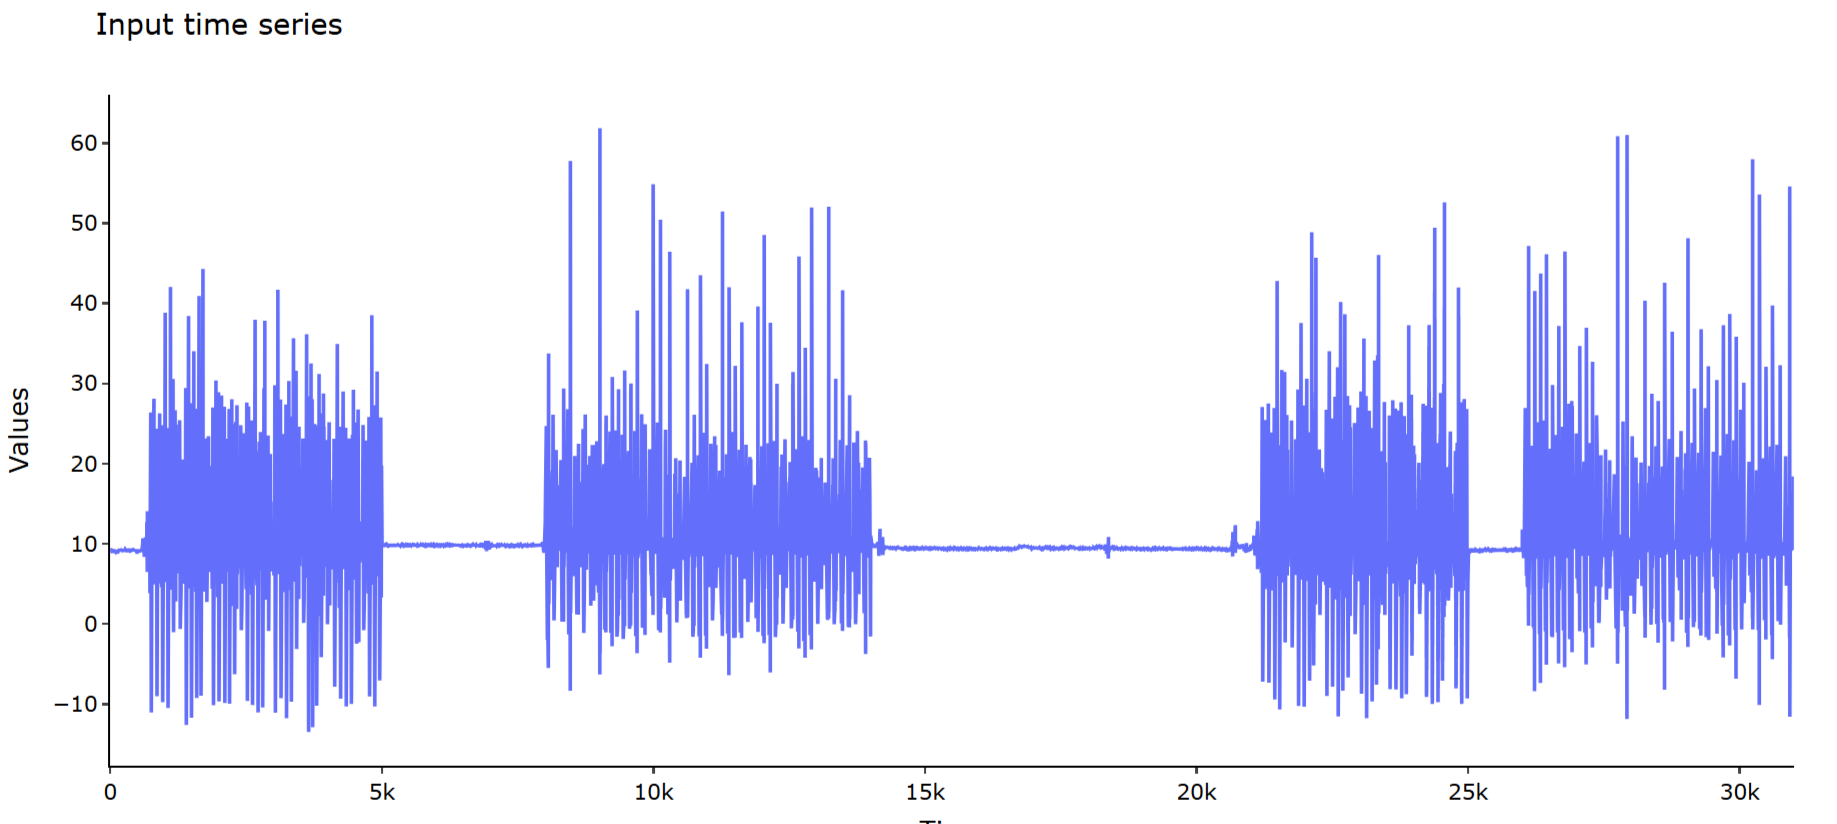

Найдите и визуализируйте матричный профиль временного ряда.

In [90]:
m = 100
excl_zone = m
mp = {}
mp = compute_mp(ts, m)  


In [59]:
plot_ts(mp['mp'], "Matrix Profile")

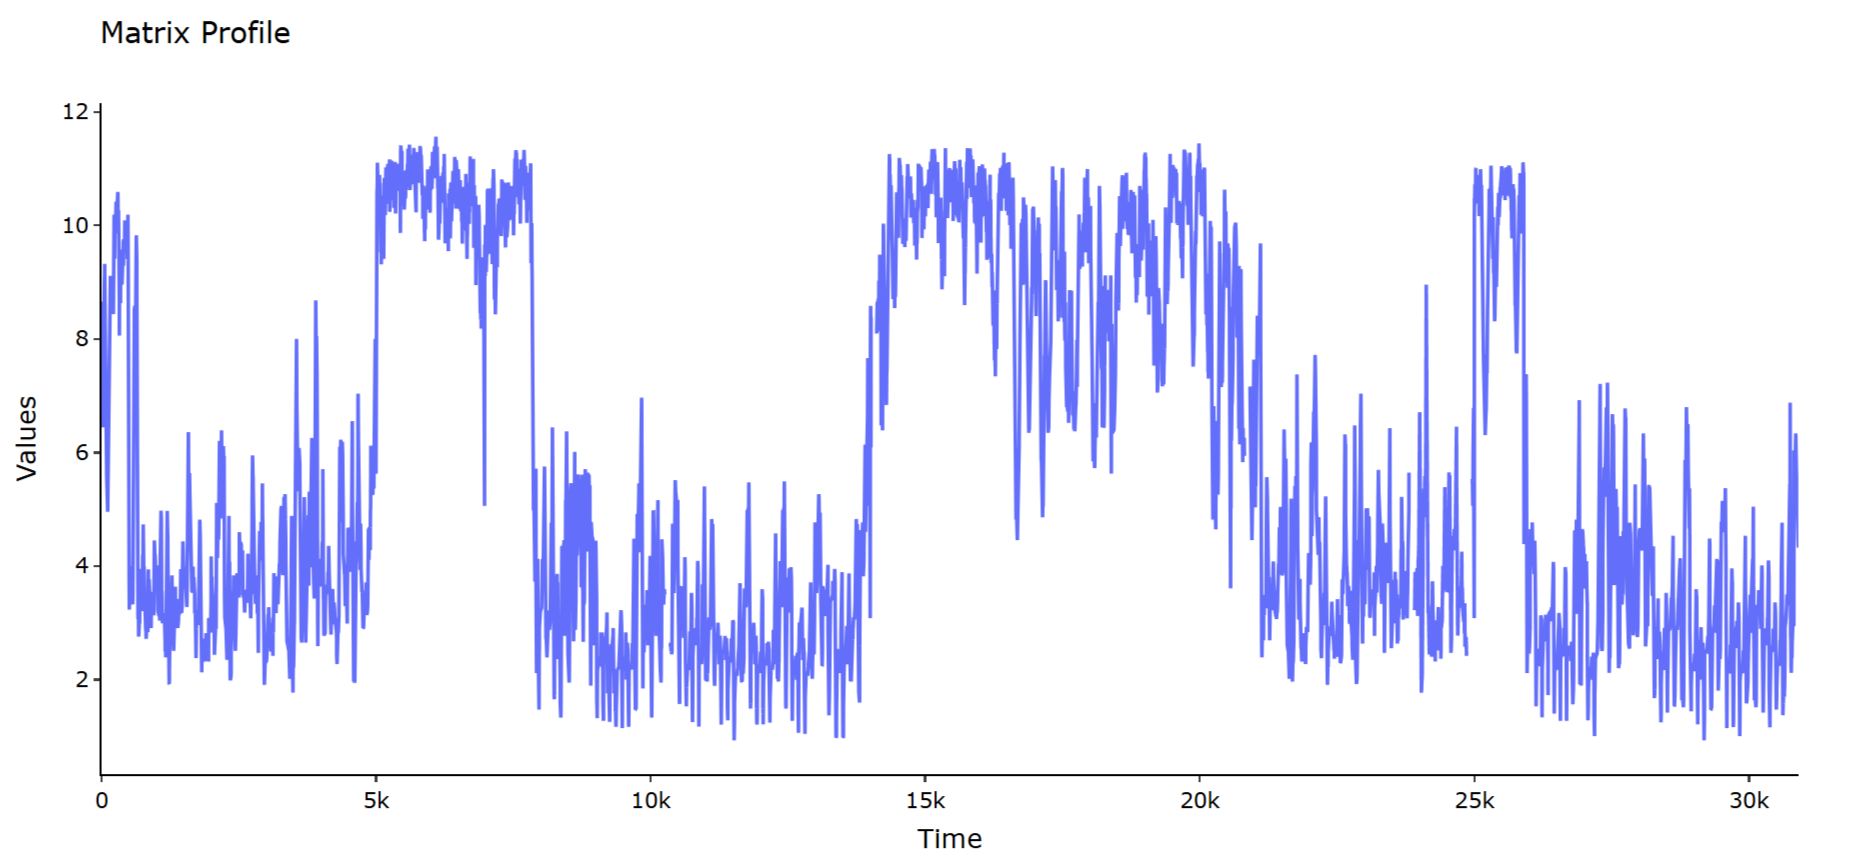

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [95]:
threshold = 0



In [96]:
try:
    mp['mp'] = mp['mp'].astype(float)
except ValueError:
    print("Ошибка преобразования: массив mp['mp'] содержит нечисловые значения.")


In [97]:
if np.isnan(mp['mp']).any() or np.isinf(mp['mp']).any():
    mp['mp'] = np.nan_to_num(mp['mp'], nan=np.nanmax(mp['mp']), posinf=np.nanmax(mp['mp']), neginf=np.nanmin(mp['mp']))


In [98]:
# Параметры
alpha = 0.5  



In [99]:
# Проверка и обработка бесконечных значений и значений NaN
mp['mp'] = np.where(np.isinf(mp['mp']) | np.isnan(mp['mp']), np.nan, mp['mp'])

# Удаление всех NaN значений из матричного профиля
mp['mp'] = mp['mp'][~np.isnan(mp['mp'])]

# Пересчет порога после очистки данных
threshold = alpha * (np.min(mp['mp']) + np.max(mp['mp']))
print("Threshold после очистки:", threshold)


Threshold после очистки: 6.246194213007073


Выполните визуализацию результатов сегментации повторяющихся активностей.

In [85]:
plot_segmentation(mp, threshold)

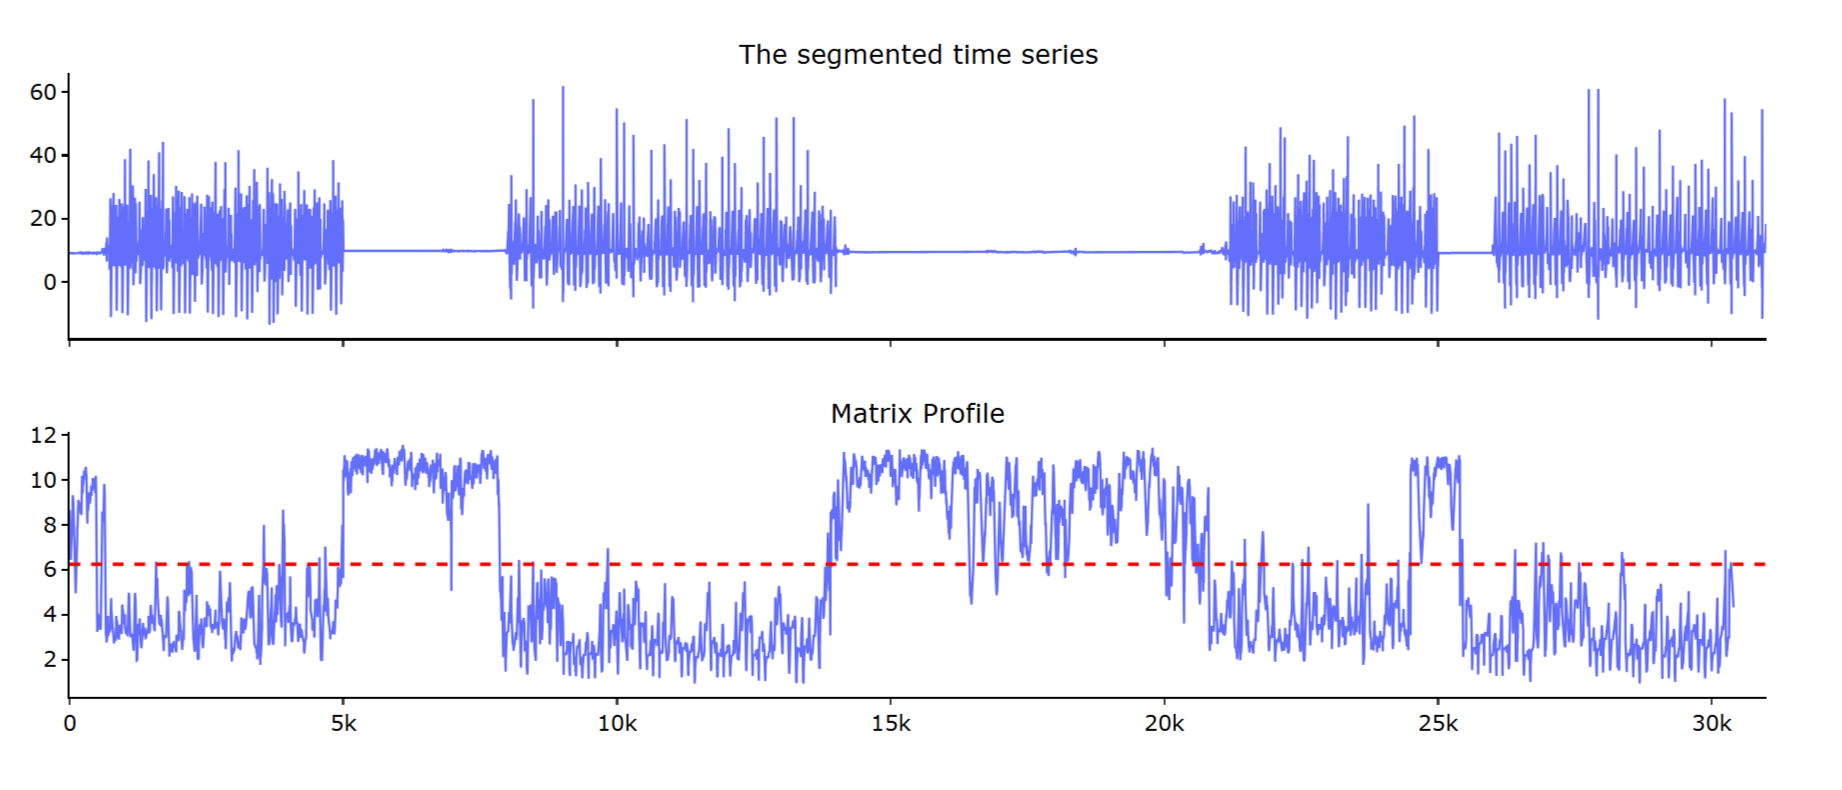

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [88]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [89]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Предсказание на основе матричного профиля
# Создаём бинарные метки активности на основе порога, предполагая, что значения ниже порога — это ходьба (0),
# а выше порога — это "подъём или спуск" (1).
predicted_labels = np.where(mp['mp'] < threshold, 0, 1)

# Обрезка labels до длины predicted_labels
labels = labels[:len(predicted_labels)]

# Вычисление точности
accuracy = accuracy_score(labels, predicted_labels)
print("Точность (accuracy):", accuracy)


Точность (accuracy): 0.051675931712772606


## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [ ]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, dayfirst=True)

Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [ ]:
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

#swap Heads and Tails of 1 and 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = heads[f'H_{swap1}'].append(tails[f'T_{swap2}'])
consumptions[f'House{swap2}'] = heads[f'H_{swap2}'].append(tails[f'T_{swap1}'])
heads, tails = heads_tails(consumptions, cutoff, house_idx)

Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [ ]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [ ]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

In [ ]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Time series with minimum score is (H_{min_i}, T_{min_j}).')

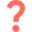
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*